**This is Project-3 i.e., Classification. - May 2021 ADSP Cohort**

# Project: Classification - Loan Eligibility Prediction

## Marks: 30

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context: 
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses. 

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan. 

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands) 
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [3]:
# from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# loading the datset
# updated the location of the path to load the data file from personal google drive

# original code - commented out to adjust for Google Drive
#data = pd.read_csv("CreditRisk.csv")
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Project_3_ML/CreditRisk.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


#### Check the info of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Observations:**

- There are 614 observations and 13 columns in the data.
- ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. The rest of the variables are of the object data type.
- There are several columns with less than 614 non-null entries i.e. these columns have missing values.
- Loan_ID column is an identifier. Let's check if each entry of the column is unique.

In [6]:
data.Loan_ID.nunique()

614

- We can see that all the entries of this column are unique. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

## Exploratory Data Analysis and Data Preprocessing

#### Dropping Loan_ID column

In [7]:
data.drop(columns=['Loan_ID'], inplace=True)

#### Summary Statistics for numerical columns

#### Question 1: Write the observations from the below summary statistics (2 Marks) 

In [10]:
#Creating a list of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


# print summary statistics 
#Write your code here
# The following line is added to show all columns in descriptive statistics as some of the results were supressed by default
pd.set_option('max_columns', None)
desc = data[num_cols].describe().T
print(desc)

                   count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         614.0   141.166124    88.340630    0.0    98.0   125.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          164.75    700.0  
Loan_Amount_Term    360.00    480.0  


**Observations:__________**

1. There are 4 numerical variables in the summary statistics – ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term.

2. The information for Loan_Amount_Term was only present on 600 records, whereas there were 614 records with information related to ApplicantIncome, CoapplicantIncome, and LoanAmount. In otherwords, the Loan_Amount_Term information was blank or missing on 14 records. 

3. The standard deviation for ApplicantIncome ($6109.04) and Coapplicant Income ($2926.24) are higher than the respective mean values i.e., ApplicantIncome ($5403.45) and Coapplicant Income ($1621.24) indicating that the data is spread out i.e., the values are not clustered around the mean. 

4. For LoanAmount variable, a high mean (141.16) and low standard deviation (88.34) highlights that the data is not spread out i.e., in other words, the values are clustered around the mean.

5. Similarly, for Loan_Amount_Term variable, a high mean (342) and low standard deviation (65.12) highlights that the data is not spread out i.e., in other words, the values are clustered around the mean.

6. Please note that, Coapplicant Income and LoanAmount both have minimum value of 0.

#### Feature Engineering

In [11]:
#Converting the scale of loan term from months to years
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [12]:
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [13]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

#### Check the distribution and outliers for each column in the data

LoanAmount
Skew : 2.36


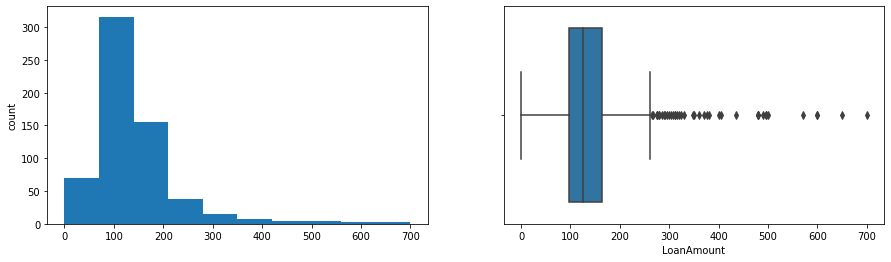

total_income
Skew : 5.63


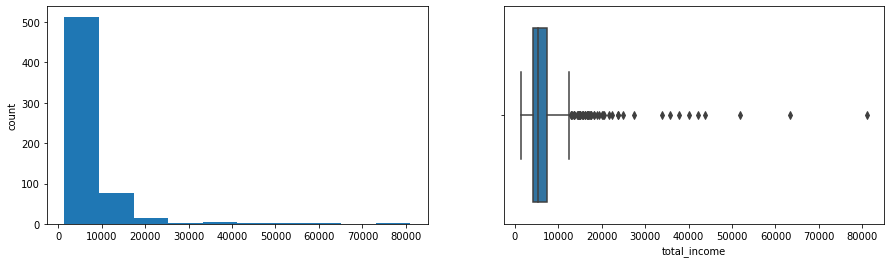

In [14]:
for col in ['LoanAmount', 'total_income']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- Both the variables are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban. 
- We can observe from the histogram that majority of values for total income are less than 10K.

Not, let's check the percentage of observations in each category for all the categorical variables.

#### Checking percentage of each category for categorical variables

#### Question 2: 

- **Write the code to check the percentage of each category for categorical columns (cat_col) (2 Marks)**
- **Write your observations (2 Marks)**

In [15]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for col in cat_col:
    print(data[col].value_counts(normalize=True)) #Write your code here
    print('*'*40)                               #Print the * 40 times to separate different variables

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
****************************************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
****************************************
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
****************************************
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


**Observations:___________**

1. Around 81% of the Loan applicants are of Gender = Male. 

2. About 65% of the loan applicants are married. 

3. About 57% of the loan applicants do not have any dependents, whereas almost equal amount i.e., about 17% and 16.8% have at least one and two dependents respectively. Also, about 8% of them had more than 3 dependents. 

4. About 78% of the loan applicants are at the Graduate level of education. 

5. Only 14% of the loan applicants are self_employed. 

6. About 84% of the loan applicants credit history meets the required guidelines for home loan. 

7. The area the property pertaining to the loan belongs to is maximum for Semiurban (37.9%) followed by Urban (32.8%) and Rural (29.1%).

8. The loan was approved in 68.7% instances. 


#### Imputing missing values

In [16]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [18]:
#Replacing 0's with null values in loan amount 
data.LoanAmount.replace(0, np.nan, inplace=True)

#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

**Now that we are done with the data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of loan amount with the total income.

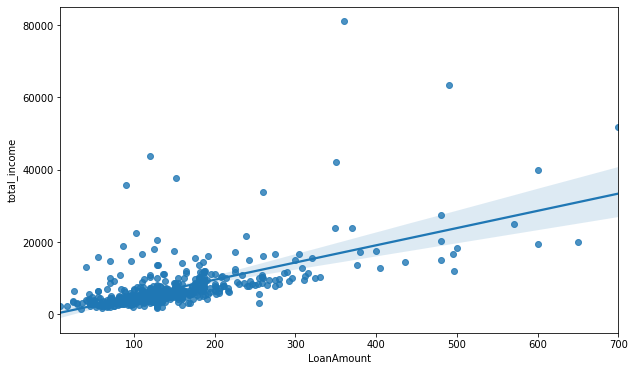

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x='LoanAmount', y='total_income', data=data)
plt.show()

- The plot shows that the loan amount is positively correlated with total income. This implies that the loan amount for higher-income applicants is progressively higher.
- There are some outliers visible, showing applicants with low income having been given loans of a higher amount.

Let's check the relationship of total income with loan status

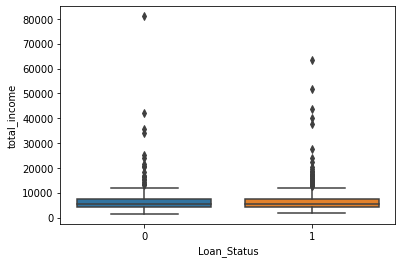

In [20]:
sns.boxplot(x=data.Loan_Status, y=data.total_income)

- Except for some outliers, there is no major difference between the income of those customers who are eligible versus those who are not. 
- This implies that income alone might not be a good indicator of a customer's loan eligibility.

Let's check how credit history is related to loan status

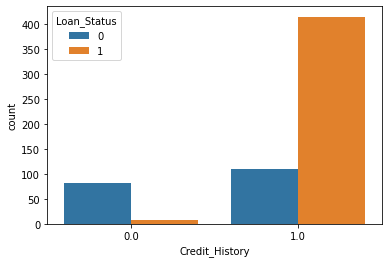

In [21]:
sns.countplot(x=data.Credit_History, hue=data.Loan_Status)

- The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

Let's check the relationship between education and loan status

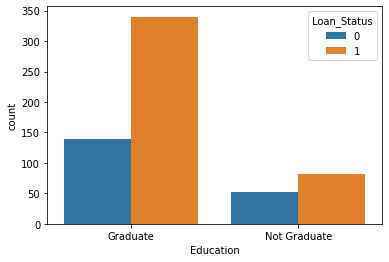

In [22]:
sns.countplot(x=data.Education, hue=data.Loan_Status)

- We can see that graduate customers are more likely to get loans.
- This might be because, in general, graduate customers have higher income when compared to non-graduates. Let's check if this is true.

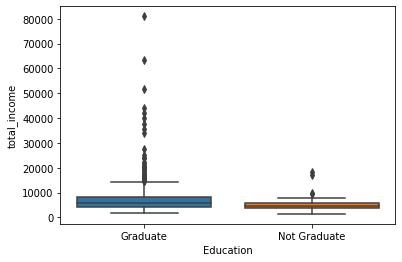

In [23]:
sns.boxplot(x=data.Education, y=data.total_income)

- We can see that this does appear to be true; graduate customers seem to earn more on average.

Let's check how property area is related with loan status

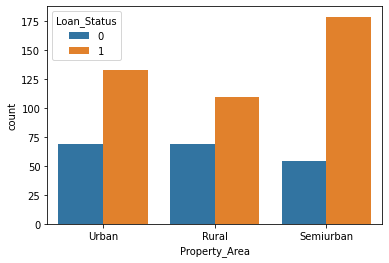

In [24]:
sns.countplot(x=data.Property_Area, hue=data.Loan_Status)

- The plot shows that more loans are approved for properties in semi-urban areas. 
- This could be due to several reasons. The bank might be charging higher interest rates for semi-urban areas or the current customer base of the company from semi-urban areas might actually be more eligible for home loans based on loan applicant features. We cannot be certain as we don't have the data to support this claim.

**Now that we have processed and explored our data, let's prepare it for modeling.**

## Preparing data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

#### Question 3: 

- **Drop the target variable from the original data and store it in a separate dataframe `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [25]:
#Separating target variable and other variables
X= data.drop(columns = ['Loan_Status'])
Y= data.Loan_Status

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   total_income      614 non-null    float64
dtypes: float64(4), object(6)
memory usage: 48.1+ KB


In [27]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [28]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [29]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion:

#### Since this is a binary classification problem, the model can make wrong predictions in one of two ways:
1. Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity
2. Predicting a customer is eligible for a loan when the customer is actually not - Financial loss

#### Which case is more important? 
* Predicting that the customer is eligible when he is not, because the person might default or not be able to return the loan, which would result in financial loss to the company.

#### How to reduce this loss i.e need to reduce False Negatives?
* In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words **Recall** is the evaluation criterion to be maximized.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [30]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

#### Question 4: Fit the logistic regression model on the train dataset using random_state=1 (2 Marks)

In [33]:
#define logistic regression model the model
log_reg=LogisticRegression(random_state=1)

#fit the model
log_reg.fit(X_train,y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Let's check the coefficient of each dependent variable in the data**

#### Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)

In [34]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

Credit_History             3.026215
Property_Area_Semiurban    0.821582
Married_Yes                0.189412
Dependents_2               0.154739
Dependents_3+              0.113786
total_income              -0.000010
LoanAmount                -0.000474
Property_Area_Urban       -0.006442
Loan_Amount_Term          -0.065874
Self_Employed_Yes         -0.098509
Gender_Male               -0.106000
Dependents_1              -0.145727
Education_Not Graduate    -0.491741
dtype: float64

**Observations:_________**

1. Logistic regression coefficients aren’t as easily interpretable because this type of regression uses the logit link function to “bend” the line of best fit and to convert the classification problem into a regression problem. Due to the logit function, Logistic regression coefficients represent the log odds that an observation is in the outcome class (i.e., Y = "Yes" or "1”) given the values of the X variables. 

2. The coefficients are postive for: "Credit_History", "Property_Area_Semiurban", "Married_Yes", "Dependents_2", and "Dependents_3+" whereas those for the rest of them are negative. 

3. Each one-unit change in "Credit_History" will increase the log odds of getting the loan approved by 3.026 times. 

4. Having the property in "Property_Area_Semiurban" will increase the log odds of getting the loan approved by 0.821 times. 

5. Being Married will increase the log odds of getting the loan approved by 0.189 times. 

6. Having two dependents will increase the log odds of getting the loan approved by 0.154 times. 

7. Being Male will decrease the log odds of getting the loan approved by -0.106 times. 

8. Having dependents = 1 will decrease the log odds of getting the loan approved by -0.145 times. 

9. The primary applicant with a non-graduate education will decrease the log odds of getting the loan approved by -0.491 times. 


#### Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)

In [35]:
odds = np.exp(log_reg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Credit_History,20.619043
Property_Area_Semiurban,2.274095
Married_Yes,1.208539
Dependents_2,1.167353
Dependents_3+,1.120512
total_income,0.999990
LoanAmount,0.999526
Property_Area_Urban,0.993578
Loan_Amount_Term,0.936249
Self_Employed_Yes,0.906187


**Observations:_____**

1. The exponent of the estimated coefficients gives us the odds ratio which are much easier to interpret than the log odds. 

2. The odds for: "Credit_History", "Property_Area_Semiurban", "Married_Yes", "Dependents_2", and "Dependents_3+" are greater than 1 (positive association) whereas those for the rest of them are less than one (negative association). 

3. For example, the odds ratio for Credit_History is 20.619, which indicates that one unit increase in credit history above the minimum required guidelines increases the odds of loan approval by 20.619 times.

4. Similarly....
The odds ratio for Property_Area_Semiurban is 2.274, which indicates that properties located within the semiurban areas are 2.274 times more likely to receive the loan approval.

5. The odds ratio for Married_Yes is 1.208, which indicates that when compared to individuals who are single those who are married are 1.208 times or 20% more likely to receive the loan approval.

6. The odds ratio for Dependents_2 is 1.167, which indicates that individuals with 2 dependents in the family are 1.167 times or 16% more likely to receive the loan approval where as it is only 12% or 1.120 times more likely for Dependents_3+ to receive the loan approval. 

7. The odds ratios for total_income, LoanAmount, and Property_Area_Urban are almost close to 1 i.e., around 0.999 indicating that there are higher or lower odds of the loan being getting approved. In other words, this means that there are other factors that play an important role in getting the loan approved and that just the total_income or loan amount ot property being in Urban area has got no influence in that regard.

8. The odds ratio for Self_Employed_Yes is 0.906, which indicates that selfemployed individuals 0.906 times (i.e., 10% less likely) to get the loan approved. 

9. The odds ratio for Education_Not_Graduate is 0.611, which indicates that applicants without a graduate level education are only 0.611 times likely to get the loan approved or it goes down by 39%. 

10.Males are only 0.89 times likely to get the loan approved or the odds of getting loan approved by males goes down by 11%.

**Now, let's check the performance of the model on the training set**

#### Question 7: Check the performance on the training data and write your observations from the below classification report and confusion matrix for the training set (3 Marks)

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       131
           1       0.80      0.98      0.88       298

    accuracy                           0.82       429
   macro avg       0.85      0.71      0.74       429
weighted avg       0.83      0.82      0.79       429



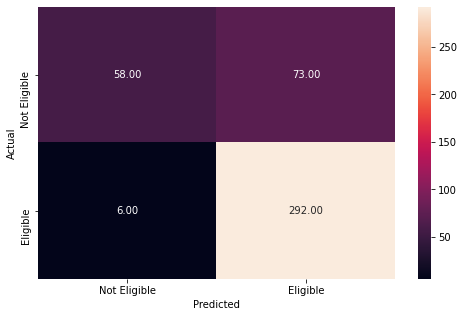

In [36]:
#predict on the training data 
#y_pred_train = _______________________ #Write your code here
y_pred_train = log_reg.predict(X_train)

# Checking performance on the training data
metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer is not eligible and the customer is actually not eligible
- **False Negative**: Predicting the customer is eligible but the customer is actually not eligible
- **True Negative**: Predicting the customer is eligible and the customer is actually eligible
- **False Positive**: Predicting the customer is not eligible but the customer is actually eligible

**Observations:_____**

1. We are getting an accuracy of about 82%. 

2. With 80% precision the model correctly identified those who got the loan approved. 

3. The recall for the training dataset is about 98% indicating that this model performs well in identifying those who are eligible and who infact got the loan approved. 

**Precision-Recall Curve for Logistic Regression**

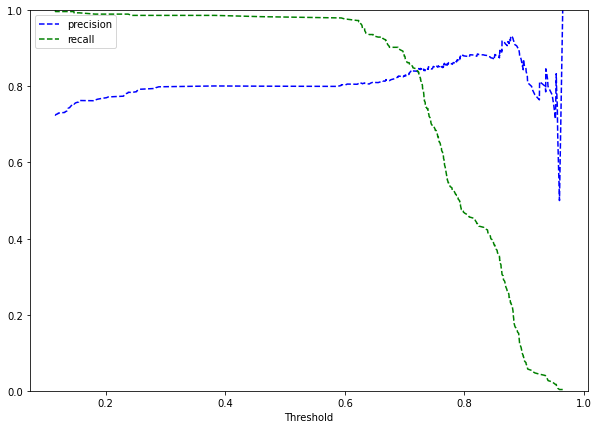

In [37]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

- We can see that precision and recall are balanced for threshold of about 0.7.
- Let's try to calculate the exact threshold where precision and recall are equal.

In [38]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.7222027953828439


- The threshold of 0.72 would give a balanced precision and recall.
- We can choose the threshold to be a bit higher to make the recall higher but then the precision would drop.
- **This decision depends on the stakeholders and other business driven factors.** For example, if the company can bear the cost of some false positives and be more conservative while approving loans then we can choose for the recall to be higher.
- Let's choose the recall to be 0.75 for the current scenario, since we have mentioned that the company wants to optimize recall.
- **Note:** We also don't want the precision to be so poor that it outweighs the benefits of a higher recall. 

#### Question 8: Compare the performance of the model on training and testing sets after changing the threshold (2 Marks)

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       131
           1       0.85      0.69      0.76       298

    accuracy                           0.70       429
   macro avg       0.68      0.71      0.68       429
weighted avg       0.75      0.70      0.71       429



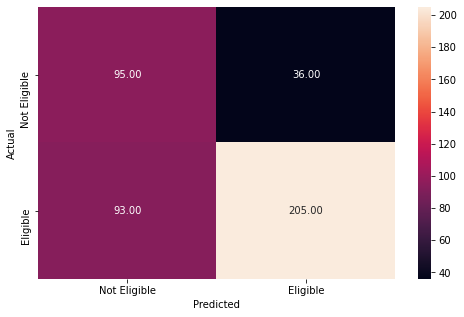

In [39]:
optimal_threshold1 = 0.75
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        61
           1       0.81      0.74      0.78       124

    accuracy                           0.71       185
   macro avg       0.68      0.70      0.69       185
weighted avg       0.73      0.71      0.72       185



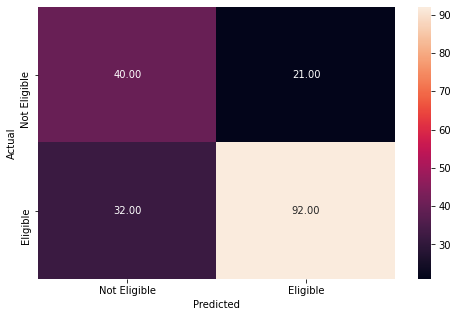

In [40]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:____**

1. The accuracy of the model on training data was 0.70, whereas it slightly went up for test data (0.71) i.e., from 70% to 71%.

2. The precision for training data was 85% and it went down to 81% for the test data. 

3. The recall for training data was 69% and it went up to 74% for the test data. 

4. While precision refers to the percentage of results which are relevant i.e., loan approvals, recall refers to the percentage of total relevant results i.e., total loan approvals that were correctly classified by our model.

### K - Nearest Neighbors (KNN)

- KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
- We will scale the attributes (dataframe X defined above) before building the KNN model.

**But before actually building the model, we need to identify the value of K to be used in KNN. We will perform the following steps for the same.**

- For every value of K (from 1 to 20), split the train set into new train and validation set (30 times)
- Scale the training data and validation data
- Take the average of the error on these train and the validation sets for each K
- Plot the average train vs the validation set error for all Ks 
- Choose a suitable K from the plot where the two errors are comparable

In [41]:
knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,21):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)
    
        #let us scale the data
        x_train_new = ss.fit_transform(x_train_new)  #fit_transform the training data
        x_val = ss.transform(x_val) #transform the validation set
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.27364341085271315],
 2: [0.11205053449951405, 0.3562015503875969],
 3: [0.15850340136054425, 0.23139534883720927],
 4: [0.16209912536443152, 0.26744186046511625],
 5: [0.18309037900874642, 0.2290697674418605],
 6: [0.1829931972789116, 0.2383720930232558],
 7: [0.19115646258503408, 0.21860465116279074],
 8: [0.18901846452866866, 0.21511627906976744],
 9: [0.1955296404275996, 0.22015503875968995],
 10: [0.19689018464528676, 0.21085271317829465],
 11: [0.20281827016520892, 0.20736434108527133],
 12: [0.19990281827016526, 0.2065891472868218],
 13: [0.20106899902818268, 0.2104651162790698],
 14: [0.1951409135082604, 0.2089147286821706],
 15: [0.2003887269193392, 0.2124031007751938],
 16: [0.19737609329446065, 0.20155038759689928],
 17: [0.20252672497570456, 0.20813953488372092],
 18: [0.19854227405247815, 0.20232558139534884],
 19: [0.20495626822157437, 0.20387596899224814],
 20: [0.2006802721088435, 0.20116279069767448]}

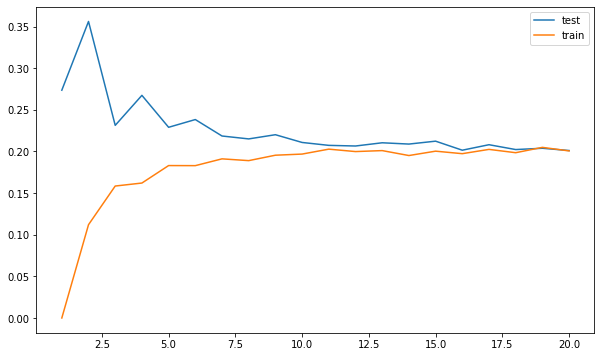

In [42]:
# Extracting k and the test error in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error error
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

- 

- We can see that the train error and the test error are more or less similar for K more than or equal to 7.
- This implies that we would get generalized results if we choose K=7.
- So, let's scale the full data and fit the model on the entire training set. 

In [43]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

In [44]:
#Fitting the model on the scaled data
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

**Now, let's check the performance of the model on the training and testing data**

#### Question 9: 

- **Check the performance of the model on the training and testing data (2 Marks)**
- **Compare the performance and write your observations (2 Marks)**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       298

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



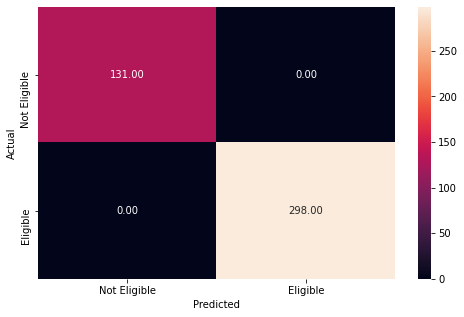

In [48]:
#predict on train data
#y_pred_train_knn = _________________________# write your code here
y_pred_train_knn = knn.predict(X_train_scaled)

#checking performance of the model
metrics_score(y_train, y_pred_train_knn)

**Observations:____**

1. After applying the scaled version of the X_train_scaled on the model, we get an accuracy of 100% and precision of 100% and recall of 100%. 

2. This implies that all those who were approved loans are classified correctly and none of those who didnot received the loans were classified as getting the loan approved. 

              precision    recall  f1-score   support

           0       0.61      0.31      0.41        61
           1       0.73      0.90      0.81       124

    accuracy                           0.71       185
   macro avg       0.67      0.61      0.61       185
weighted avg       0.69      0.71      0.68       185



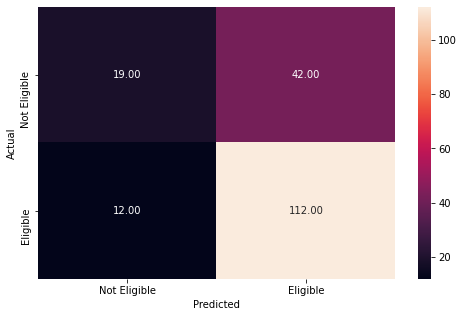

In [49]:
#predict on test data
#y_pred_test_knn = _____________________# Write your code here
y_pred_test_knn = knn.predict(X_test_scaled)

#checking performance of the model
metrics_score(y_test, y_pred_test_knn)

**Observation:____**

1. The X_test_scaled data was considered. 

2. The accuracy of the model on test data was 0.71 or 71%. 

3. The precision for test data was 73% and recall was 90%.
 
4. While precision refers to the percentage of results which are relevant i.e., loan approvals, recall refers to the percentage of total relevant results i.e., total loan approvals that were correctly classified by our model.


#### Question 10: Write the conclusion on the key factors that are driving the approval of loan and write your recommendations to the business on how can they minimize the credit risk. (5 Marks)

## Conclusion:

Wrtite your conclusioin here

1. Having a Credit_History that meets requirements is the most important feature.
2. Although, about 81% of the Loan applicants are of Gender = Male, being male reduces the chance of getting loan approved by about 11%.
3.	The odds ratio for Self_Employed_Yes is 0.906, which indicates that selfemployed individuals 0.906 times (i.e., 10% less likely) to get the loan approved.
4. Those individuals with 2 or 3+ dependents are more likely to get the loan approved than those with dependents = 1. 
5. For example, the odds ratio for Credit_History is 20.619, which indicates that one unit increase in credit history above the minimum required guidelines increases the odds of loan approval by 20.619 times.
6. Similarly.... The odds ratio for Property_Area_Semiurban is 2.274, which indicates that properties located within the semiurban areas are 2.274 times more likely to receive the loan approval.
7. The accuracy of test data set was only 71%. 
8. Scaling of the data has help improved the model's accuracy and precision to 100%. This implies that all those who were approved loans are classified correctly and none of those who didnot received the loans were classified as getting the loan approved.

## Recommendations:

Write your recommendations here

1. We can see that Credit_History is the most important feature followed by the presence of the property in semiurban area.

2. The threshold of 0.75 was considered as the company wants to optimize recall for this scenario. This decision depends on the stakeholders and other business driven factors. For example, if the company can bear the cost of some false positives and be more conservative while approving loans then we can choose for the recall to be higher.

3. The data modelers for the company might want to consider pulling multiple data samples for training and test data and then identifying as to how the threshold changes. That might be helpful to identify an optiomal threshold.

4. Also, it might be helpful to just focus on smaller models by looking at subgroups of populations to identify a better classification of those with loan approvals.

5. Consider applying scaling to ensure there is an increase in precision and recall of the model. 

6. If possible, apply the model on another dataset for a different timeperiod to see how that plays out.

In [1]:
# Google Co Lab didn't have the option to download the .ipynb script as a html file
# The following script helps in download the .ipynb file first and then reimport within the environment for creating a .html file
%%shell
jupyter nbconvert --to html /Classification.ipynb

SyntaxError: invalid syntax (<ipython-input-1-f9a2ac23987a>, line 4)